# Define a function to create a filename


In [1]:
def getFileName(name, n_samples, model_name, layer_name):
    return name \
        + "_{}_".format(n_samples) \
        + "_{}_".format(model_name) \
        + "_{}".format(layer_name)  \
        + ".npy"   

# Load the Model RDM

In [2]:
import os
import numpy as np
model_name = 'resnet34'
layer_name = 'all'
SAVE_PATH = '/mnt/antares_raid/home/agnessa/RSA/' 
NR_OF_SAMPLES = 10000
path = os.path.join(SAVE_PATH + 'Model_RDM/', getFileName("Model_RDM",NR_OF_SAMPLES,model_name,layer_name))

# save np.load - the function was behaving weirdly, and this was the solution
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
Model_RDM = np.load(path)
np.load = np_load_old

# Plot the Model RDM


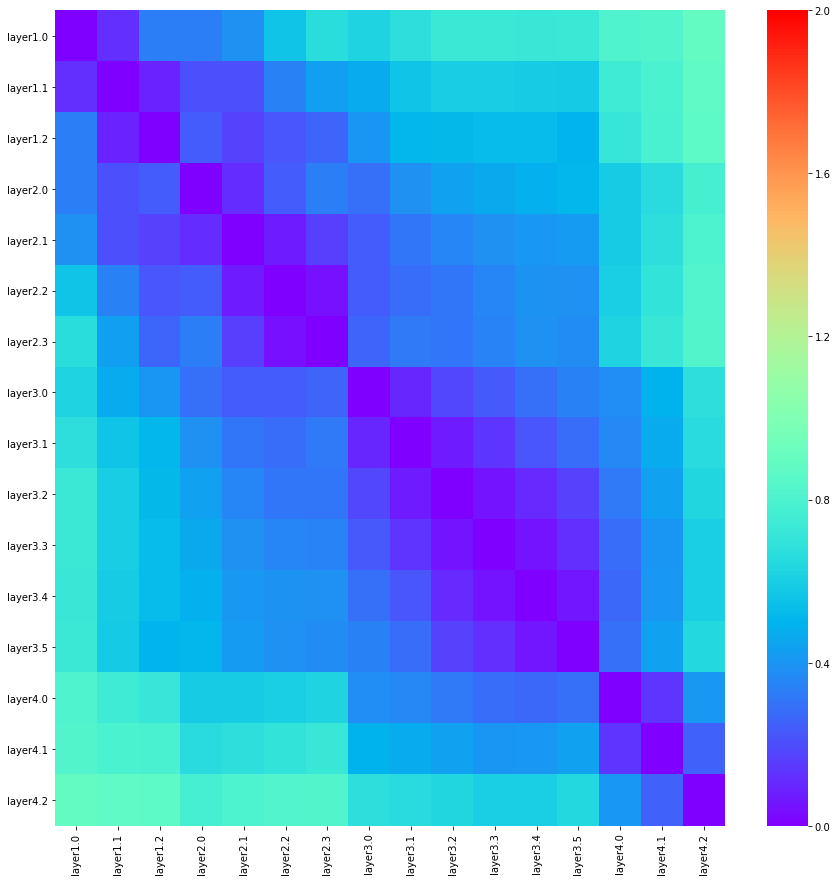

In [38]:
import matplotlib.pyplot as plt
import seaborn
Model_RDM[np.isnan(Model_RDM)]=0.0 
fig = plt.figure(figsize=(15,15))
layer_names = np.array(['layer1.0','layer1.1','layer1.2','layer2.0','layer2.1','layer2.2','layer2.3','layer3.0','layer3.1',
              'layer3.2','layer3.3','layer3.4','layer3.5','layer4.0','layer4.1','layer4.2'])
ax = seaborn.heatmap(1-Model_RDM, xticklabels = layer_names, yticklabels = layer_names, cmap='rainbow', vmin=0.0, vmax=2.0)
plt.xticks(rotation=90) 
plt.yticks(rotation=0)
plt.show()

# Save as a .png file

In [39]:
path = os.path.join(SAVE_PATH + 'Model_RDM_plots', getFileName("Model_RDM",NR_OF_SAMPLES,model_name,layer_name) + '.png')
fig.savefig(path)